In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
fe = font_manager.FontEntry(
    fname='KBO Dia Gothic_bold.ttf', # ttf 파일이 저장되어 있는 경로
    name='KBO Dia Gothic_bold')                        # 이 폰트의 원하는 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 15, 'font.family': 'KBO Dia Gothic_bold'}) # 폰트 설정



In [453]:
font_=font_manager.FontProperties(fname= 'MALGUNBD.TTF')
# 맑은 고딕 폰트를 폰트 설정하기
rc('font', family=font_.get_name())
df = pd.read_excel('음주운전사고통계.xlsx')

In [454]:
# 데이터 정렬
df=df.drop('사고번호',axis=1)
df=df.drop('부상신고자수',axis=1)
df=df.drop('노면상태',axis=1)
df=df.drop('도로형태',axis=1)
df.rename(columns={'시군구':'장소'},inplace=True)
df['사고일시'] = df['사고일시'].str[:]
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')
df['장소']=df['장소'].str[6:]
df['사고유형']=df['사고유형'].str.split('-').str[0]
df['피해운전자 연령']=df['피해운전자 연령'].fillna('0')
df['가해운전자 연령']=df['가해운전자 연령'].str.split('').str[1]+df['가해운전자 연령'].str.split('').str[2]
df['피해운전자 연령']=df['피해운전자 연령'].str.split('').str[1]+df['피해운전자 연령'].str.split('').str[2]
df['가해운전자 연령']=df['가해운전자 연령'].astype(int)
df['피해운전자 연령']=df['피해운전자 연령'].apply(lambda x: '0' if not x.isdigit() else x)
df['피해운전자 연령']=df['피해운전자 연령'].astype(int)

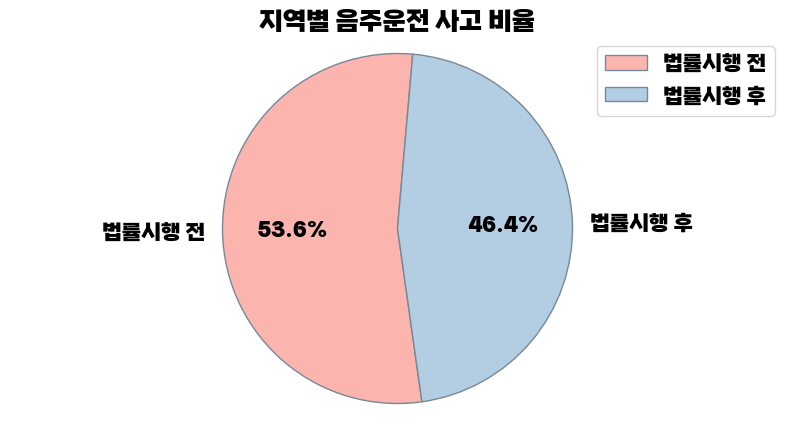

In [455]:
# 윤창호법 이후 이전 2.5년씩--------시각화----------------------------------------------------
before_law = df[df['사고일시'] < '2019-06-01']
after_law = df[(df['사고일시'] >= '2019-06-01') & (df['사고일시'] < '2022-01-01')]
countDF=pd.DataFrame([['법률시행 전',len(before_law.index)],['법률시행 후',len(after_law.index)]])
plt.figure(figsize=(10, 5))
plt.pie(countDF[1], labels=countDF[0], autopct='%.1f%%', startangle=85, colors=plt.cm.Pastel1.colors,wedgeprops = {"edgecolor" : "lightslategrey",'linewidth': 1,'antialiased': True})
plt.title('지역별 음주운전 사고 비율')
plt.legend(labels=countDF[0], loc = 'upper right')
plt.axis('equal')
plt.show()

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_17276\1049698319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_law['요일'] = before_law['요일'].map(Day_map)
C:\Users\KDP-50\AppData\Local\Temp\ipykernel_17276\1049698319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_law['사고내용'] = before_law['사고내용'].map(Day_map)


Text(0.5, 1.0, '법률 시행 이전의 사고현황')

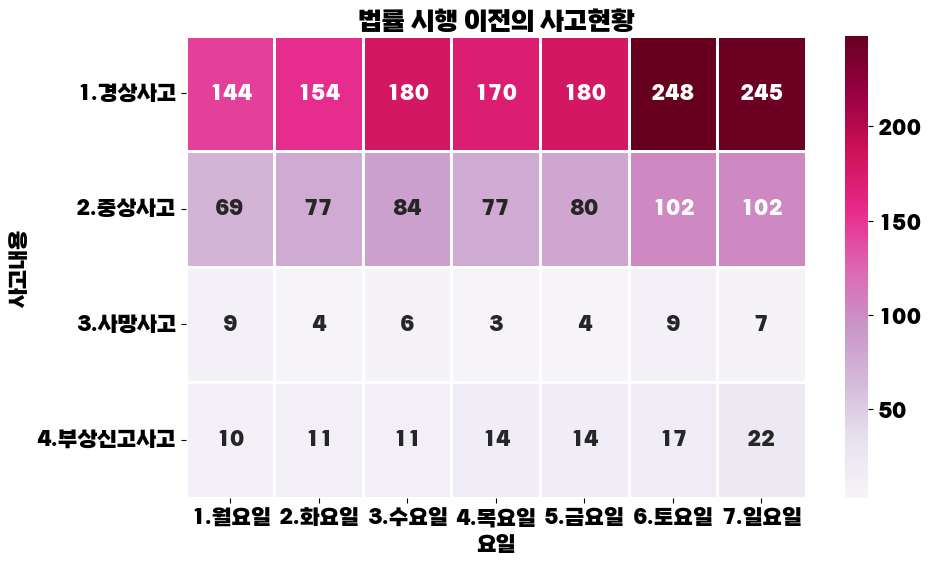

<Figure size 1000x600 with 0 Axes>

In [456]:
fig = plt.figure(figsize=(10,6))
ax1= fig.add_subplot(1,1,1)
Day_map = {'월요일': '1.월요일', '화요일': '2.화요일', '수요일': '3.수요일', '목요일': '4.목요일', '금요일': '5.금요일', '토요일': '6.토요일', '일요일': '7.일요일'}
before_law['요일'] = before_law['요일'].map(Day_map)
Day_map= {'경상사고': '1.경상사고', '중상사고':'2.중상사고', '사망사고':'3.사망사고', '부상신고사고':'4.부상신고사고'}
before_law['사고내용'] = before_law['사고내용'].map(Day_map)
plt.figure(figsize=(10, 6))
table= before_law.pivot_table(index=['사고내용'],columns=['요일'],aggfunc='size')
sns.heatmap(table,annot=True,cmap="PuRd",fmt="d",linewidths=1, ax=ax1)
ax1.set_title("법률 시행 이전의 사고현황")

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_17276\2489119085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_law['요일'] = after_law['요일'].map(Day_map)
C:\Users\KDP-50\AppData\Local\Temp\ipykernel_17276\2489119085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_law['사고내용'] = after_law['사고내용'].map(Day_map)


Text(0.5, 1.0, '법률 시행 이후의 사고현황')

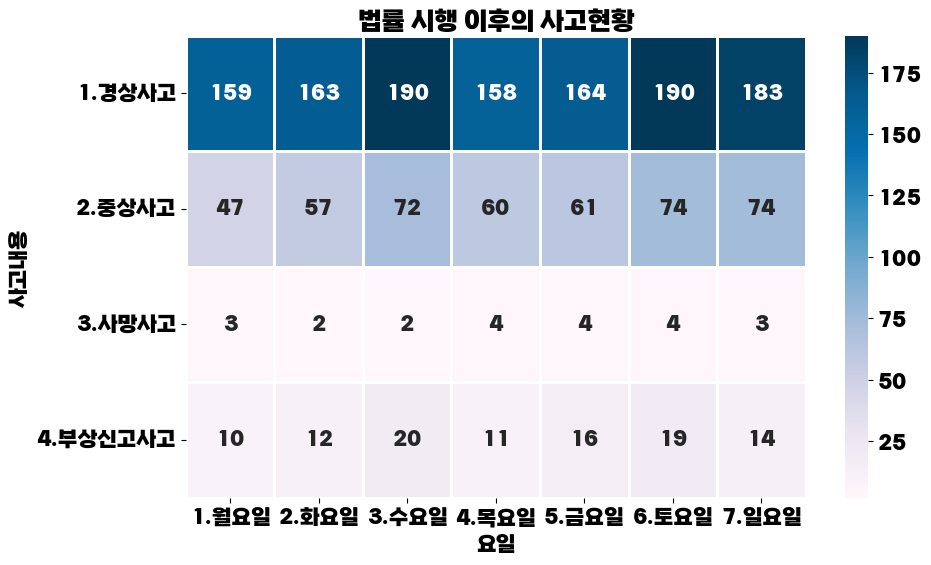

<Figure size 1000x600 with 0 Axes>

In [457]:
fig = plt.figure(figsize=(10,6))
ax1= fig.add_subplot(1,1,1)
Day_map = {'월요일': '1.월요일', '화요일': '2.화요일', '수요일': '3.수요일', '목요일': '4.목요일', '금요일': '5.금요일', '토요일': '6.토요일', '일요일': '7.일요일'}
after_law['요일'] = after_law['요일'].map(Day_map)
Day_map= {'경상사고': '1.경상사고', '중상사고':'2.중상사고', '사망사고':'3.사망사고', '부상신고사고':'4.부상신고사고'}
after_law['사고내용'] = after_law['사고내용'].map(Day_map)
plt.figure(figsize=(10, 6))
table= after_law.pivot_table(index=['사고내용'],columns=['요일'],aggfunc='size')
sns.heatmap(table,annot=True,cmap='PuBu',fmt='d',linewidths=1,ax=ax1)
ax1.set_title("법률 시행 이후의 사고현황")


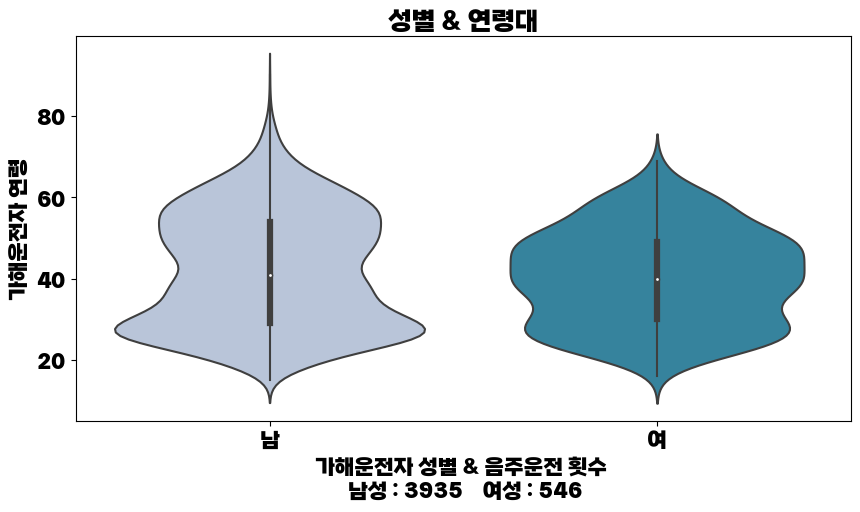

In [458]:
# 성별과 연령대 시각화 그래프
plt.figure(figsize=(10, 5))
sns.violinplot(x='가해운전자 성별', y='가해운전자 연령', data=df, palette='PuBuGn')
plt.xlabel(f'가해운전자 성별 & 음주운전 횟수 \n 남성 : {len(df[(df["가해운전자 성별"] == "남")])}    여성 : {len(df[(df["가해운전자 성별"] == "여")])}')
plt.ylabel('가해운전자 연령')
plt.title('성별 & 연령대')
plt.show()

<Figure size 1000x500 with 0 Axes>

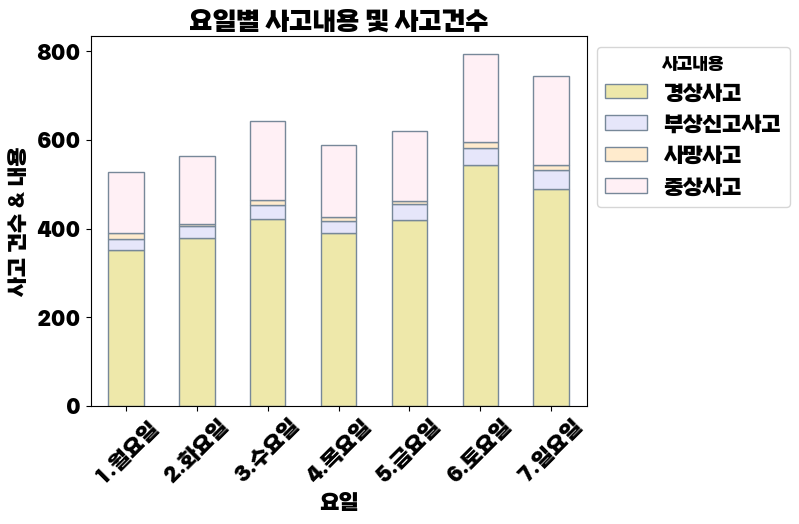

In [459]:
# # 요일별 사고가 자주 일어나는 지역 (월별*사고횟수)-시각화-----------------------------------
week_df=df.copy()
Day_map = {'월요일': '1.월요일', '화요일': '2.화요일', '수요일': '3.수요일', '목요일': '4.목요일', '금요일': '5.금요일', '토요일': '6.토요일', '일요일': '7.일요일'}
week_df['요일'] = week_df['요일'].map(Day_map)
df_sorted = week_df.sort_values(by='요일')
plt.figure(figsize=(10, 5))
ax1 = df_sorted.groupby(['요일', '사고내용']).size().unstack().plot(kind='bar', edgecolor="lightslategrey",stacked=True, color=['palegoldenrod', 'lavender', 'blanchedalmond', 'lavenderblush'])
plt.xlabel('요일')
plt.ylabel('사고 건수 & 내용')
plt.title('요일별 사고내용 및 사고건수')
plt.xticks(rotation=45)
plt.legend(title='사고내용', title_fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

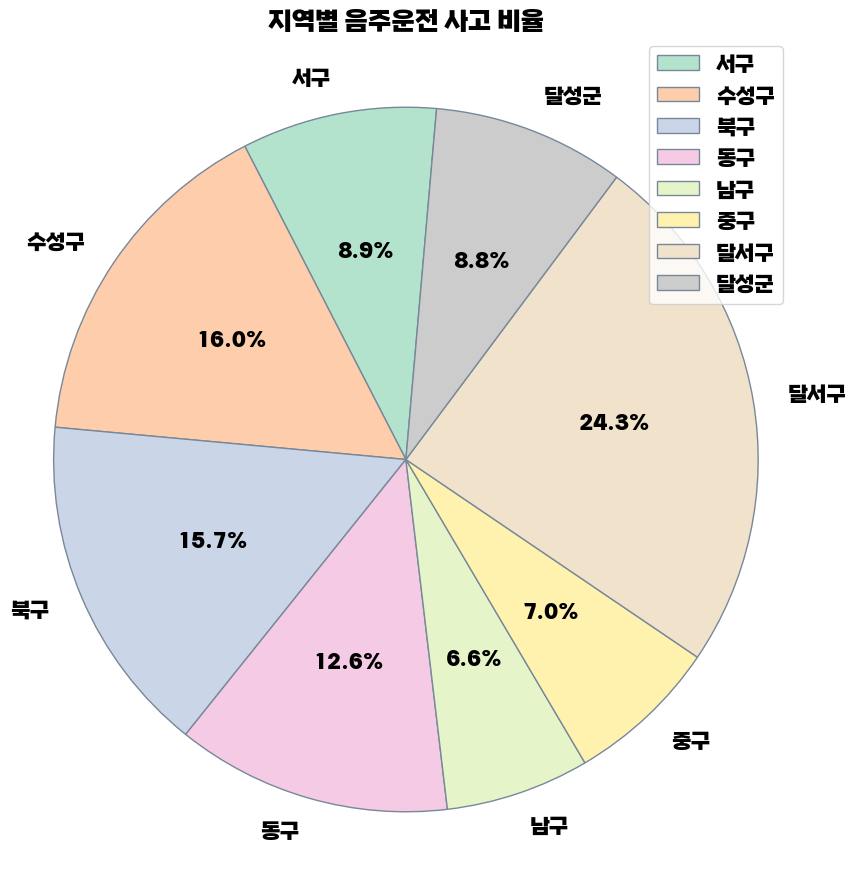

In [460]:
# 각 구별 음주운전 사고 비율 시각화
local_count_list = [['서구',len(df[df.장소.str.split(' ').str[0] == '서구'])],
                    ['수성구',len(df[df.장소.str.split(' ').str[0] == '수성구'])],
                    ['북구',len(df[df.장소.str.split(' ').str[0] == '북구'])],
                    ['동구',len(df[df.장소.str.split(' ').str[0] == '동구'])],
                    ['남구',len(df[df.장소.str.split(' ').str[0] == '남구'])],
                    ['중구',len(df[df.장소.str.split(' ').str[0] == '중구'])],
                    ['달서구',len(df[df.장소.str.split(' ').str[0] == '달서구'])],
                    ['달성군',len(df[df.장소.str.split(' ').str[0] == '달성군'])]]
local_count_df= pd.DataFrame(local_count_list)
plt.figure(figsize=(10, 11))
plt.pie(local_count_df[1], labels=local_count_df[0], autopct='%.1f%%', startangle=85, colors=plt.cm.Pastel2.colors,wedgeprops = {"edgecolor" : "lightslategrey",'linewidth': 1,'antialiased': True})
plt.title('지역별 음주운전 사고 비율')
plt.legend(labels=local_count_df[0], loc = 'upper right')
plt.axis('equal')
plt.show()

In [461]:
# 사고 종류확인
df['사고내용'].value_counts()

경상사고      2994
중상사고      1187
부상신고사고     227
사망사고        73
Name: 사고내용, dtype: int64

In [462]:
# 지역별 사고 정도 [장소*사고내용]-시각화----------------------------------------------------
# 서구
seo = df[(df.장소.str.split(' ').str[0] == '서구')]
# 수성구
suseong = df[(df.장소.str.split(' ').str[0] == '수성구')]
# 북구
buk = df[(df.장소.str.split(' ').str[0] == '북구')]
# 동구
dong = df[(df.장소.str.split(' ').str[0] == '동구')]
# 남구
nam = df[(df.장소.str.split(' ').str[0] == '남구')]
# 중구
joong = df[(df.장소.str.split(' ').str[0] == '중구')]
# 달서구
dalseo = df[(df.장소.str.split(' ').str[0] == '달서구')]
# 달성군
dalseong = df[(df.장소.str.split(' ').str[0] == '달성군')]

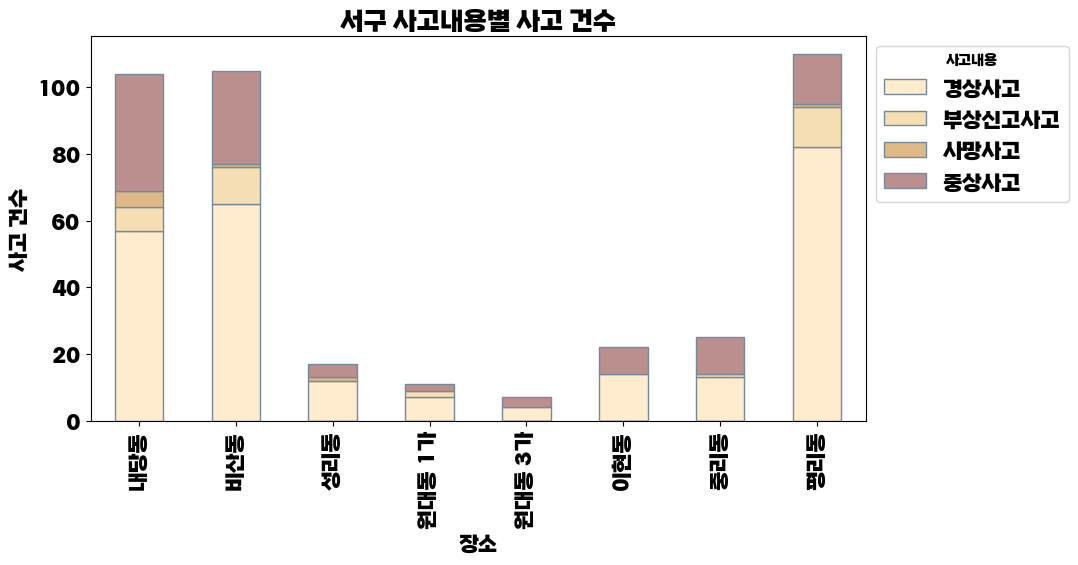

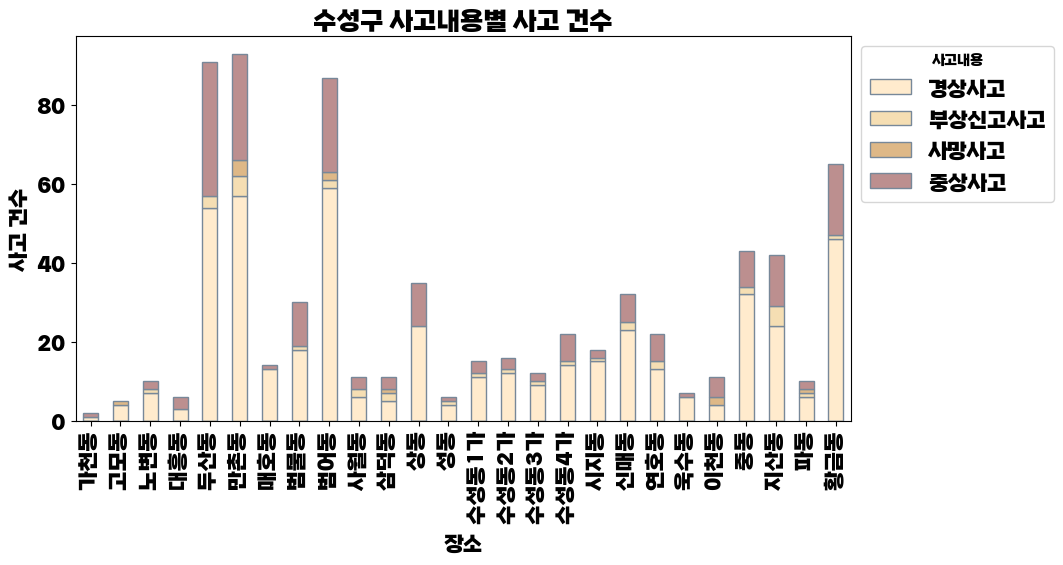

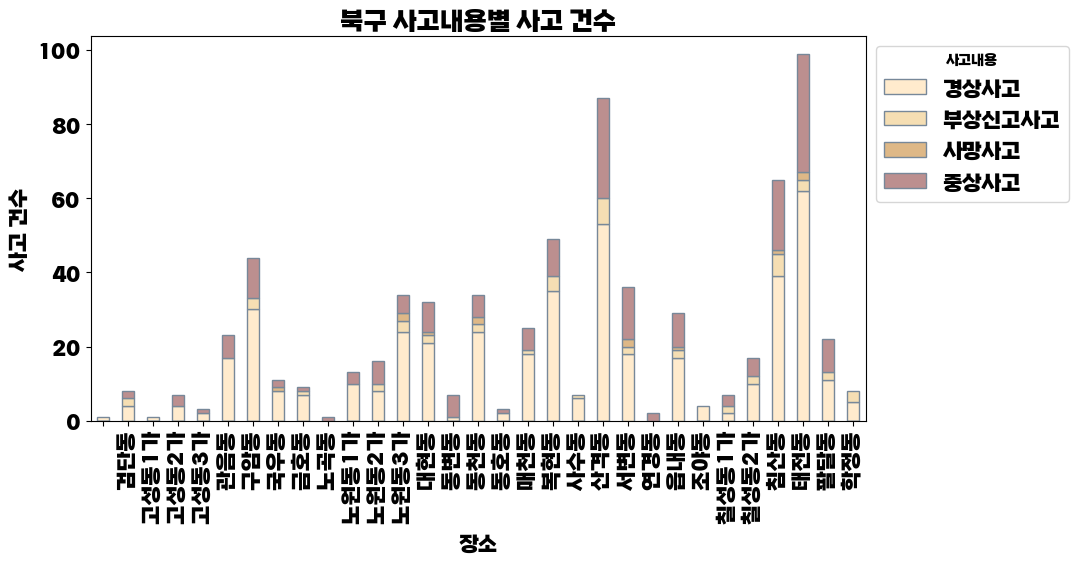

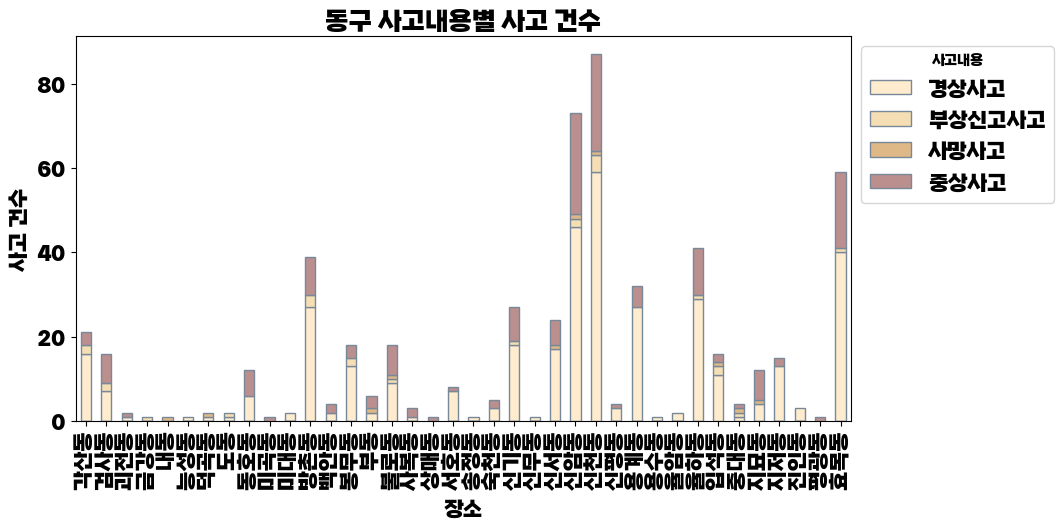

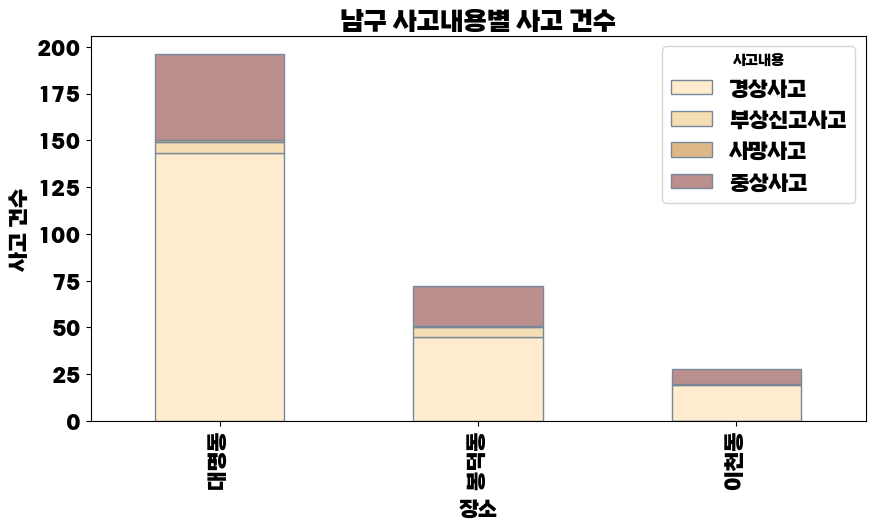

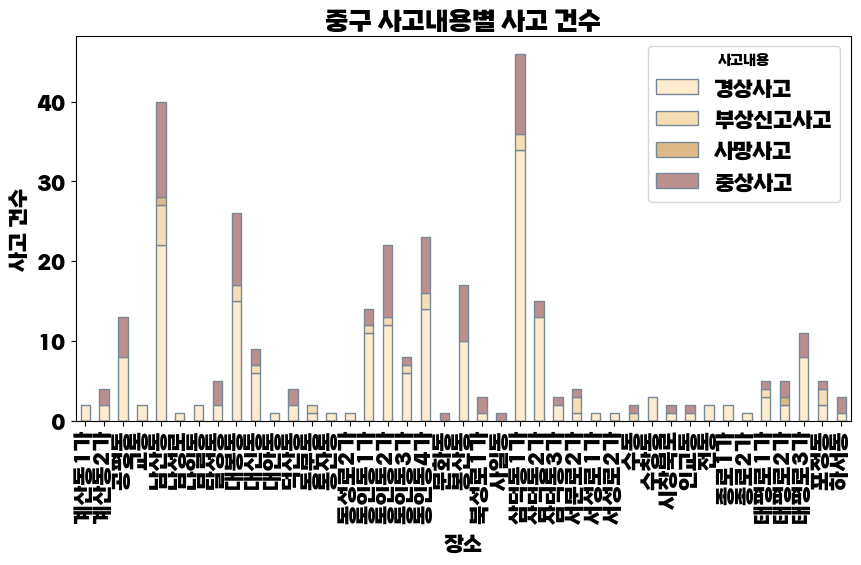

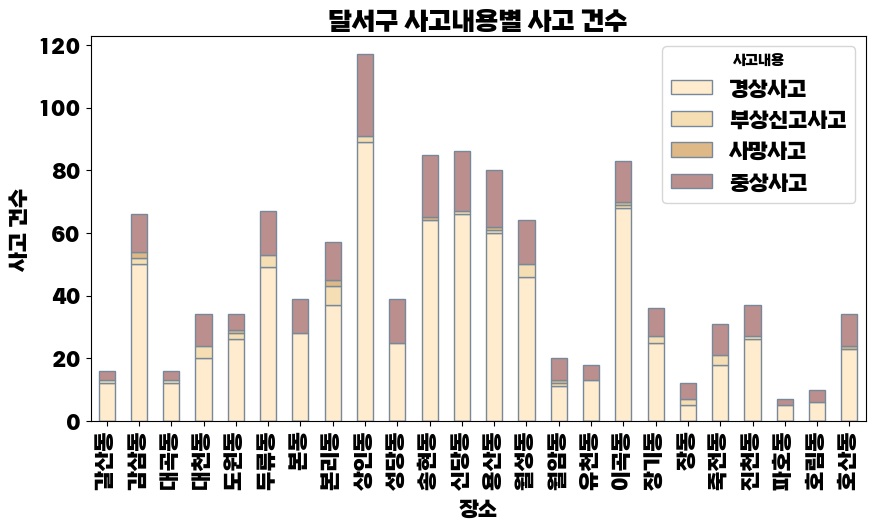

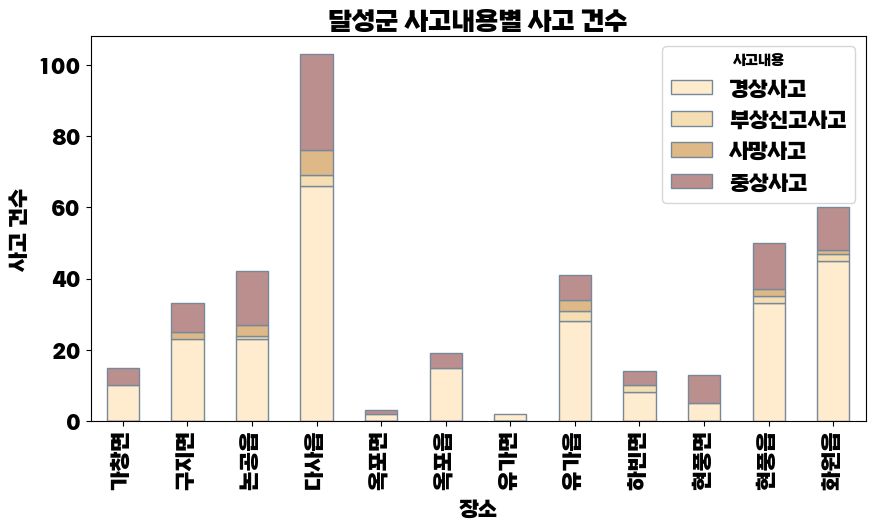

In [463]:
# 서구
seogu=seo["장소"].sort_values()
seogu=seogu.str.replace("서구","")
seogu=seogu.unique()
seogu=seogu.tolist()
len(seogu)
ax1 = seo.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'],figsize=(10,5),stacked=True,edgecolor="lightslategrey")
ax1=plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('서구 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(0,8)],labels=["내당동","비산동","성리동","원대동 1가","원대동 3가","이현동","중리동","평리동"],rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
# 수성구
suseonggu=suseong["장소"].sort_values()
suseonggu=suseonggu.str.replace("수성구","")
suseonggu=suseonggu.unique()
suseonggu=suseonggu.tolist()
len(suseonggu)
ax2 = suseong.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'], figsize=(10,5),stacked=True,edgecolor="lightslategrey")
plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('수성구 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(len(suseonggu))],labels= suseonggu,rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
# 북구
bukgu=buk["장소"].sort_values()
bukgu=bukgu.str.replace("북구","")
bukgu=bukgu.unique()
bukgu=bukgu.tolist()
len(bukgu)
ax3 = buk.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'], figsize=(10,5),stacked=True,edgecolor="lightslategrey")
plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('북구 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(len(bukgu))],labels= bukgu,rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
# 동구
donggu=dong["장소"].sort_values()
donggu=donggu.str.replace("동구","")
donggu=donggu.unique()
donggu=donggu.tolist()
len(donggu)
ax4 = dong.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'], figsize=(10,5),stacked=True,edgecolor="lightslategrey")
plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('동구 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(len(donggu))],labels= donggu,rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
# 남구
namgu=nam["장소"].sort_values()
namgu=namgu.str.replace("남구","")
namgu=namgu.unique()
namgu=namgu.tolist()
len(namgu)
ax5 = nam.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'], figsize=(10,5),stacked=True,edgecolor="lightslategrey")
plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('남구 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(len(namgu))],labels= namgu,rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
# 중구
joonggu=joong["장소"].sort_values()
joonggu=joonggu.str.replace("중구","")
joonggu=joonggu.unique()
joonggu=joonggu.tolist()
len(joonggu)
ax6 = joong.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'],figsize=(10,5), stacked=True,edgecolor="lightslategrey")
plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('중구 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(len(joonggu))],labels= joonggu,rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
# 달서구
dalseogu=dalseo["장소"].sort_values()
dalseogu=dalseogu.str.replace("달서구","")
dalseogu=dalseogu.unique()
dalseogu=dalseogu.tolist()
len(dalseogu)
ax7 = dalseo.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'], figsize=(10,5),stacked=True,edgecolor="lightslategrey")
plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('달서구 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(len(dalseogu))],labels= dalseogu,rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
# 달성군
dalseonggu=dalseong["장소"].sort_values()
dalseonggu=dalseonggu.str.replace("달성군","")
dalseonggu=dalseonggu.unique()
dalseonggu=dalseonggu.tolist()
len(dalseonggu)
ax8 = dalseong.groupby(['장소', '사고내용']).size().unstack().plot(kind='bar', color = ['blanchedalmond','wheat','burlywood','rosybrown'],figsize=(10,5), stacked=True,edgecolor="lightslategrey")
plt.xlabel('장소')
plt.ylabel('사고 건수')
plt.title('달성군 사고내용별 사고 건수')
plt.xticks(ticks=[i for i in range(len(dalseonggu))],labels= dalseonggu,rotation=90)
plt.legend(title='사고내용', title_fontsize='10', bbox_to_anchor=(1, 1))
plt.show()